# Assignment

I decided to treat this as a classification problem by creating a new binary variable affair (did the woman have at least one affair?) and trying to predict the classification for each woman.


# Dataset

The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.


# Description of Variables

The dataset contains 6366 observations of 9 variables:

        1.rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)

        2.age: woman's age

        3. yrs_married: number of years married

        4.children: number of children

        5. religious: woman's rating of how religious she is (1 = not religious, 4 =strongly religious)

        6. educ:  level of education (9 = grade school, 12 = high school, 

                                  14 = some college, 16 = college graduate,

                                  17 = some graduate school, 20 = advanced degree)

        7. occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled,

                                          3 = "white collar", 4 = teacher/nurse/writer/technician/skilled,

                                          5 = managerial/business, 6 = professional with advanced degree)

        8.occupation_husb: husband's occupation (same coding as above)

        9.affairs: time spent in extra-marital affairs


# Code to loading data and modules:

In [1]:
# import libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices


from sklearn.linear_model import LogisticRegression

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#from sklearn.cross_validation import cross_val_score 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


# ignore warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
%matplotlib inline


In [12]:
dataset =sm.datasets.fair.load_pandas().data
dataset

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [3]:
print("Features names: ",dataset.columns)
print(3*'\n')
print("Number of rows and columns: ", dataset.shape)


Features names:  Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')




Number of rows and columns:  (6366, 9)


In [4]:
dataset.yrs_married.unique()

array([ 9. , 13. ,  2.5, 16.5, 23. ,  6. ,  0.5])

# EDA DATA

In [5]:
print("Features names: ",dataset.columns)
print(3*'\n')
print("Number of rows and columns: ", dataset.shape)

Features names:  Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')




Number of rows and columns:  (6366, 9)


In [6]:
dataset.describe().T # stat visualizaion

,count,mean,std,min,25%,50%,75%,max
rate_marriage,6366.0,4.109645,0.961430,1.0,4.0,4.0,5.000000,5.000000
age,6366.0,29.082862,6.847882,17.5,22.0,27.0,32.000000,42.000000
yrs_married,6366.0,9.009425,7.280120,0.5,2.5,6.0,16.500000,23.000000
children,6366.0,1.396874,1.433471,0.0,0.0,1.0,2.000000,5.500000
religious,6366.0,2.426170,0.878369,1.0,2.0,2.0,3.000000,4.000000
educ,6366.0,14.209865,2.178003,9.0,12.0,14.0,16.000000,20.000000
occupation,6366.0,3.424128,0.942399,1.0,3.0,3.0,4.000000,6.000000
occupation_husb,6366.0,3.850141,1.346435,1.0,3.0,4.0,5.000000,6.000000
affairs,6366.0,0.705374,2.203374,0.0,0.0,0.0,0.484848,57.599991


In [7]:
dataset.info() 
# rints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [8]:
#-------------------------loops for known which variable under categorical columns


category_features = []
threshold = 10
for each in dataset.columns:
    if dataset[each].nunique() < threshold:
        category_features.append(each)

for each in category_features:
    dataset[each] = dataset[each].astype('category')
    

category_features 

['rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'occupation',
 'occupation_husb']

In [9]:
dataset.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

# VISUALIZATION DATA

C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

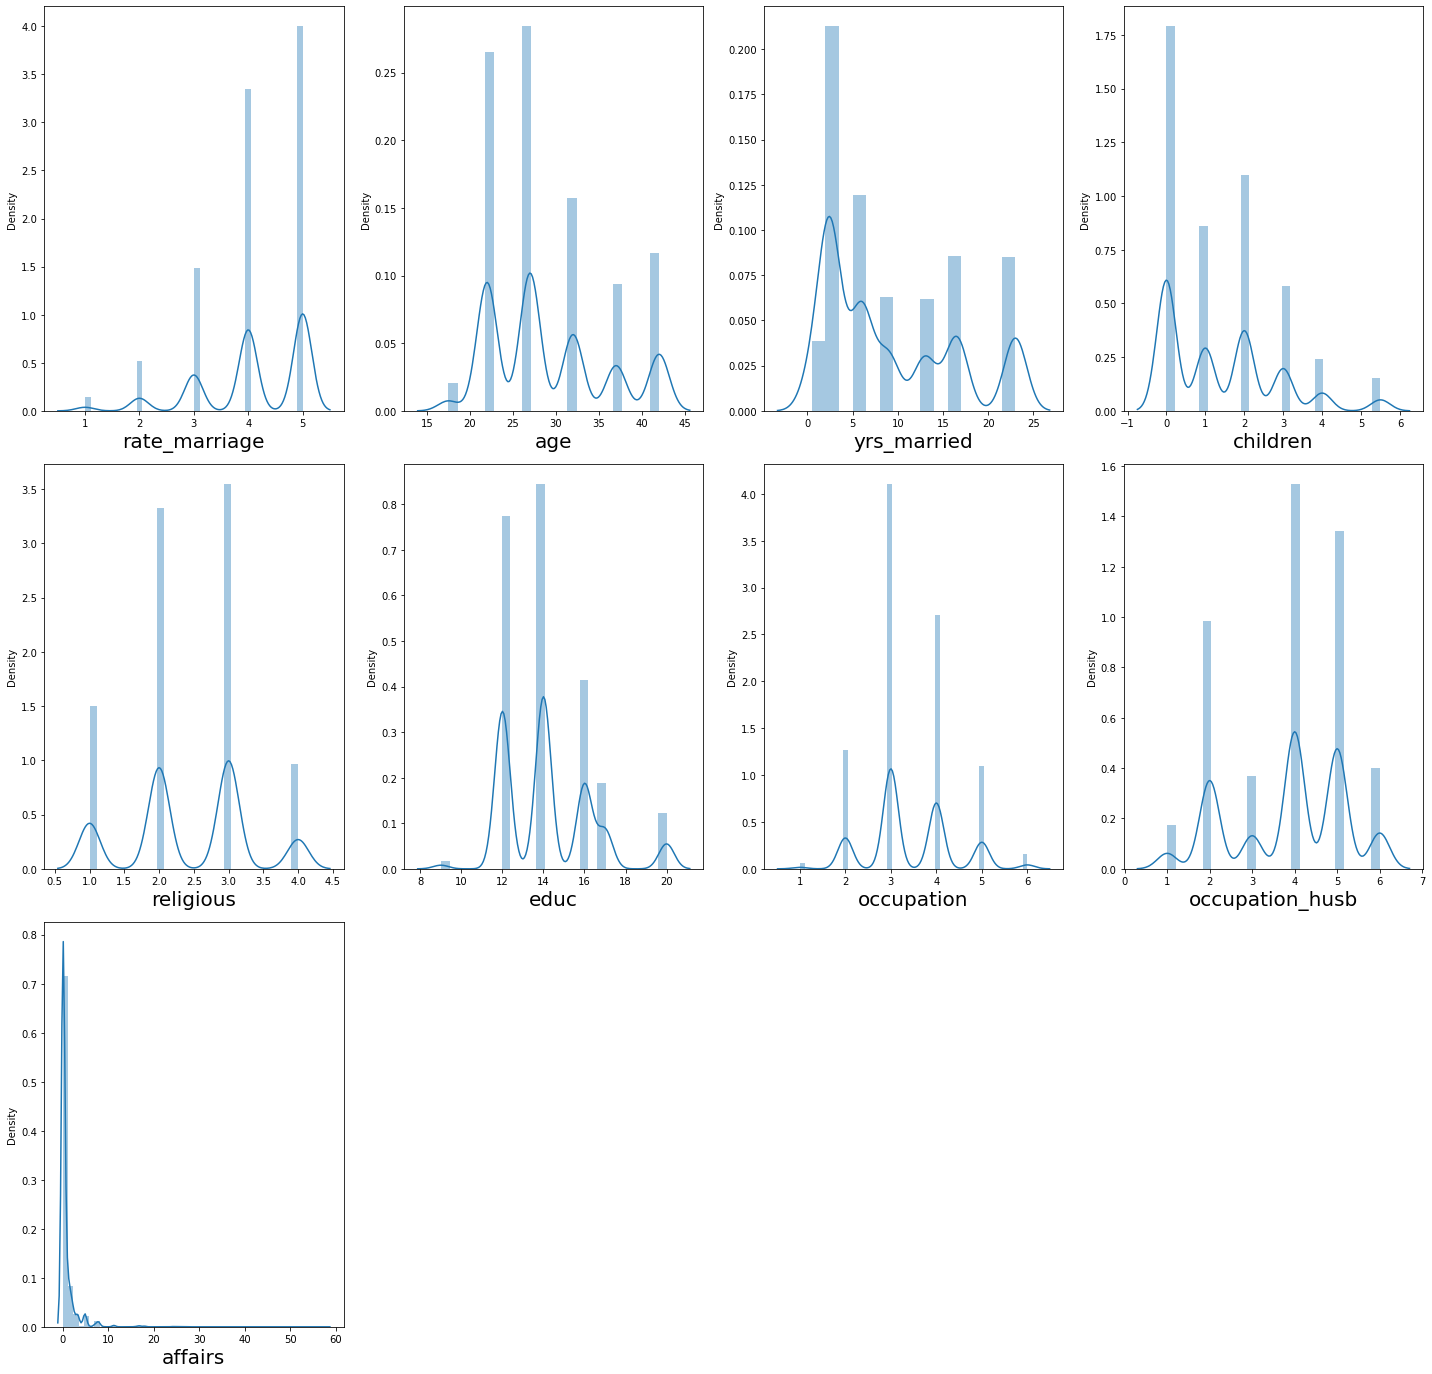

In [13]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dataset:
    if plotnumber<=9 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(dataset[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

plt.savefig('Distribution plot.png')

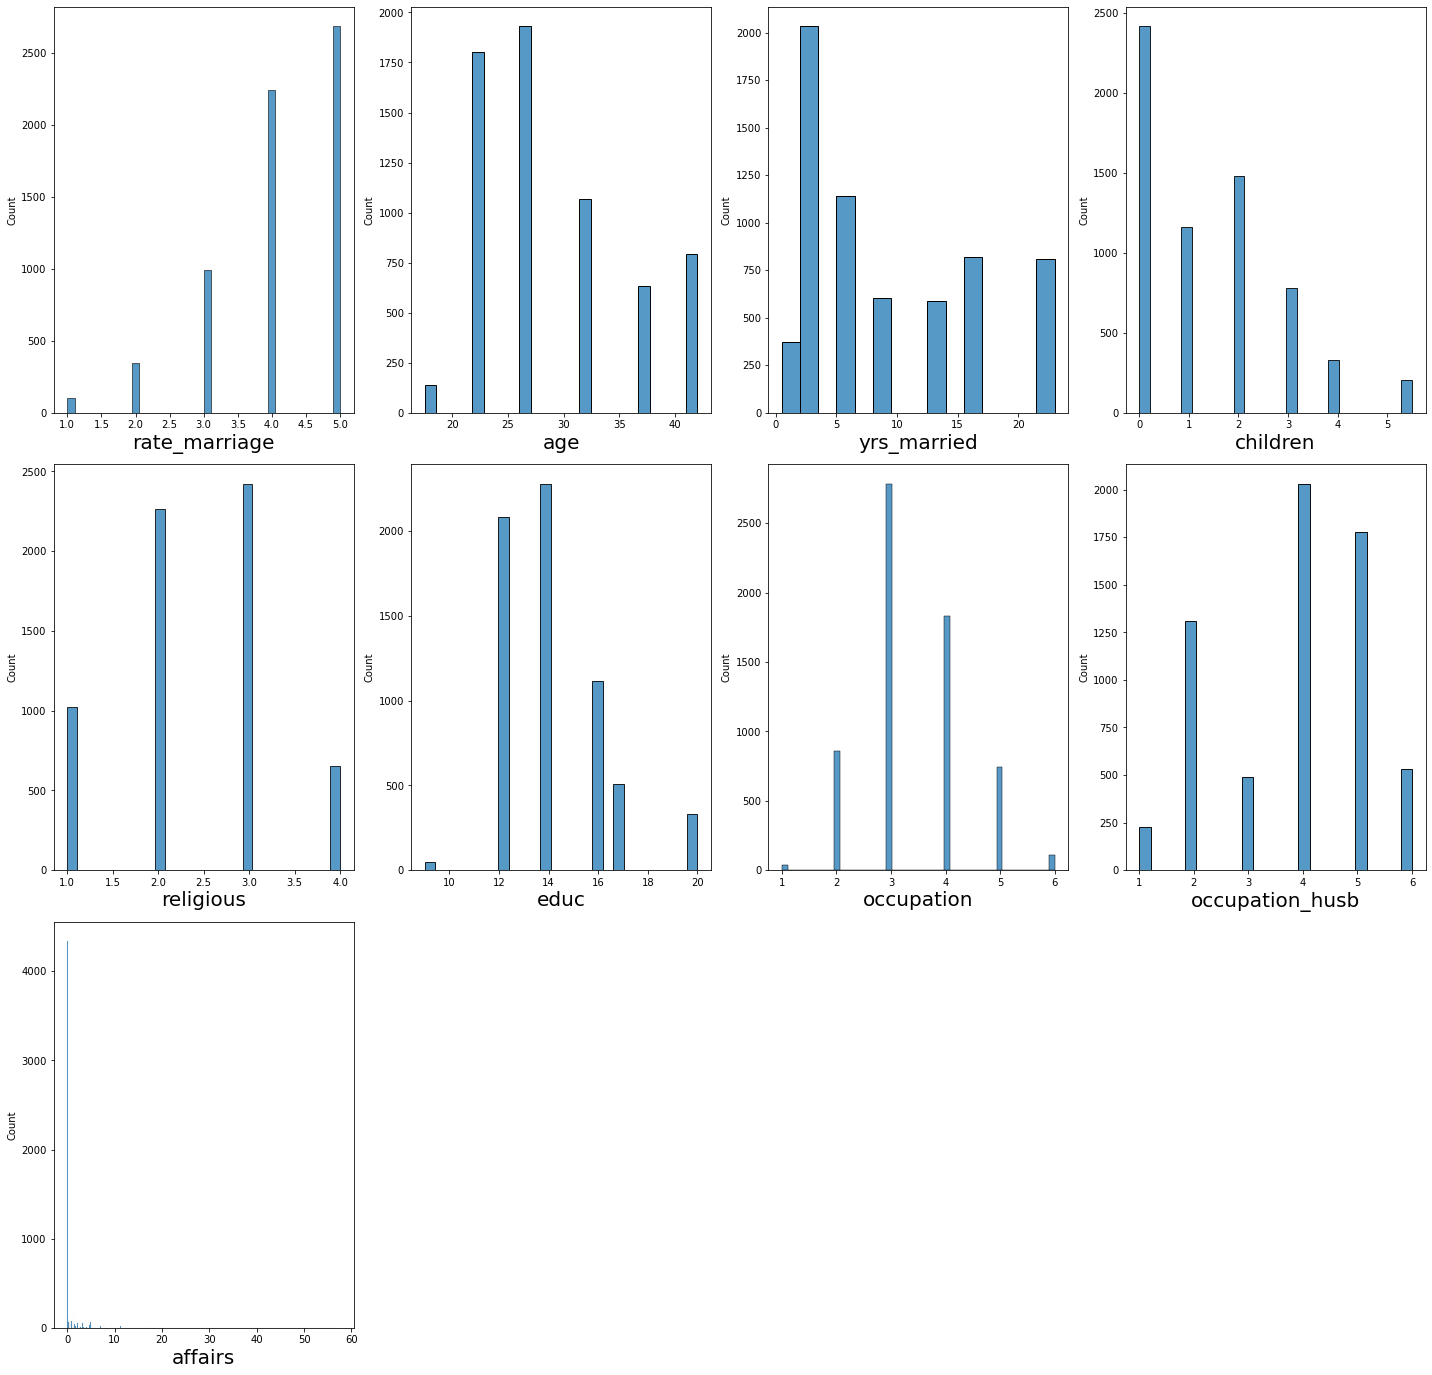

In [14]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dataset:
    if plotnumber<=9 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(dataset[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

plt.savefig('Histogram plot.png')

# Feature selection of the DATA

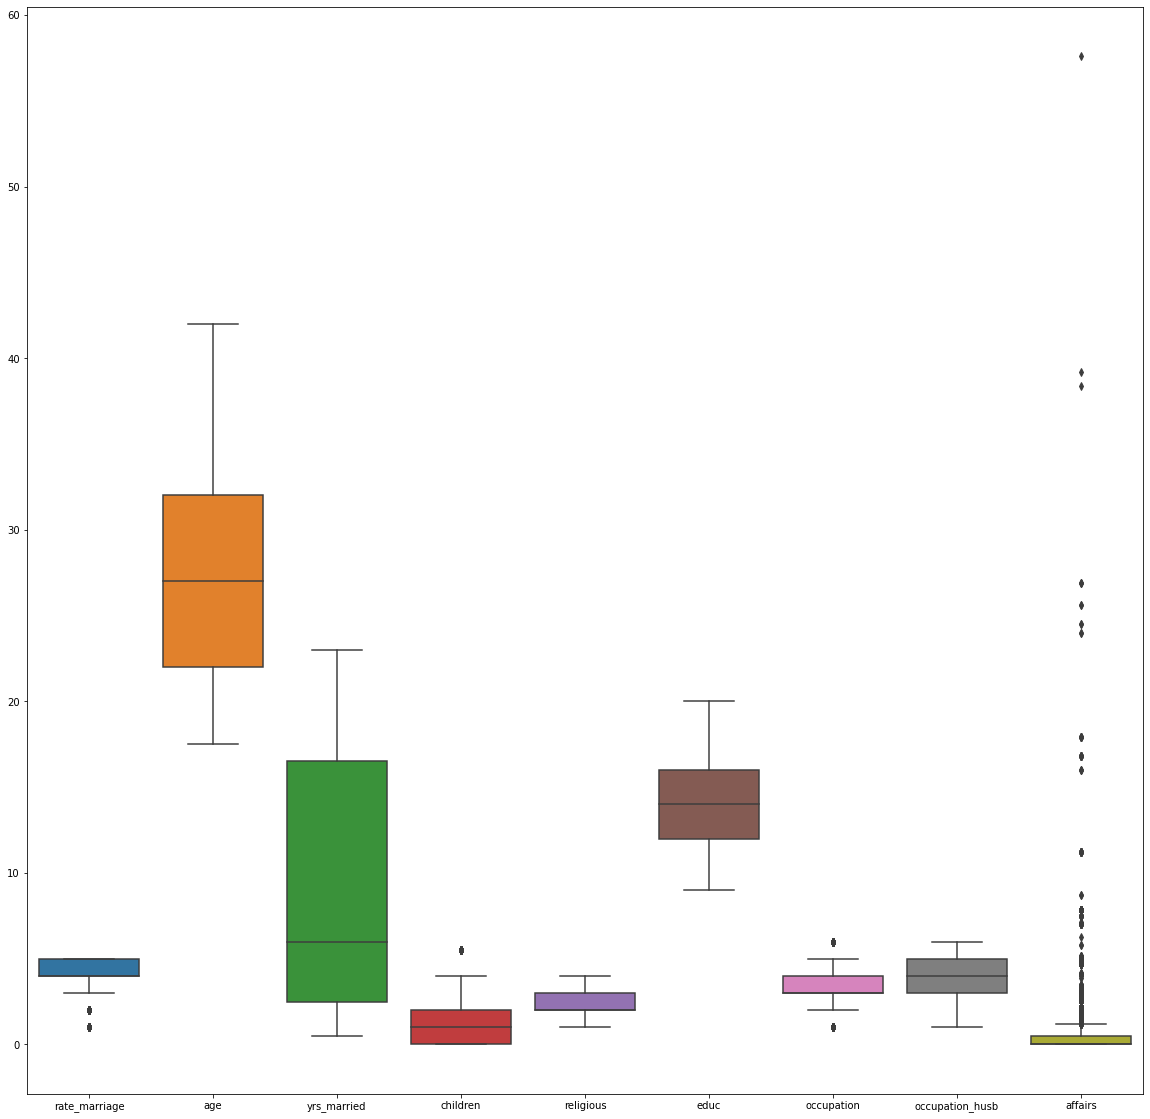

<Figure size 432x288 with 0 Axes>

In [15]:
fig , ax = plt.subplots(figsize=(20,20))
sns.boxplot(data= dataset, ax = ax)
plt.show()

plt.savefig('BOX plot.png')

In [16]:
# Finding out the correlation between the features
corr = dataset.corr()
corr

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614
affairs,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000


In [17]:
dataset

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


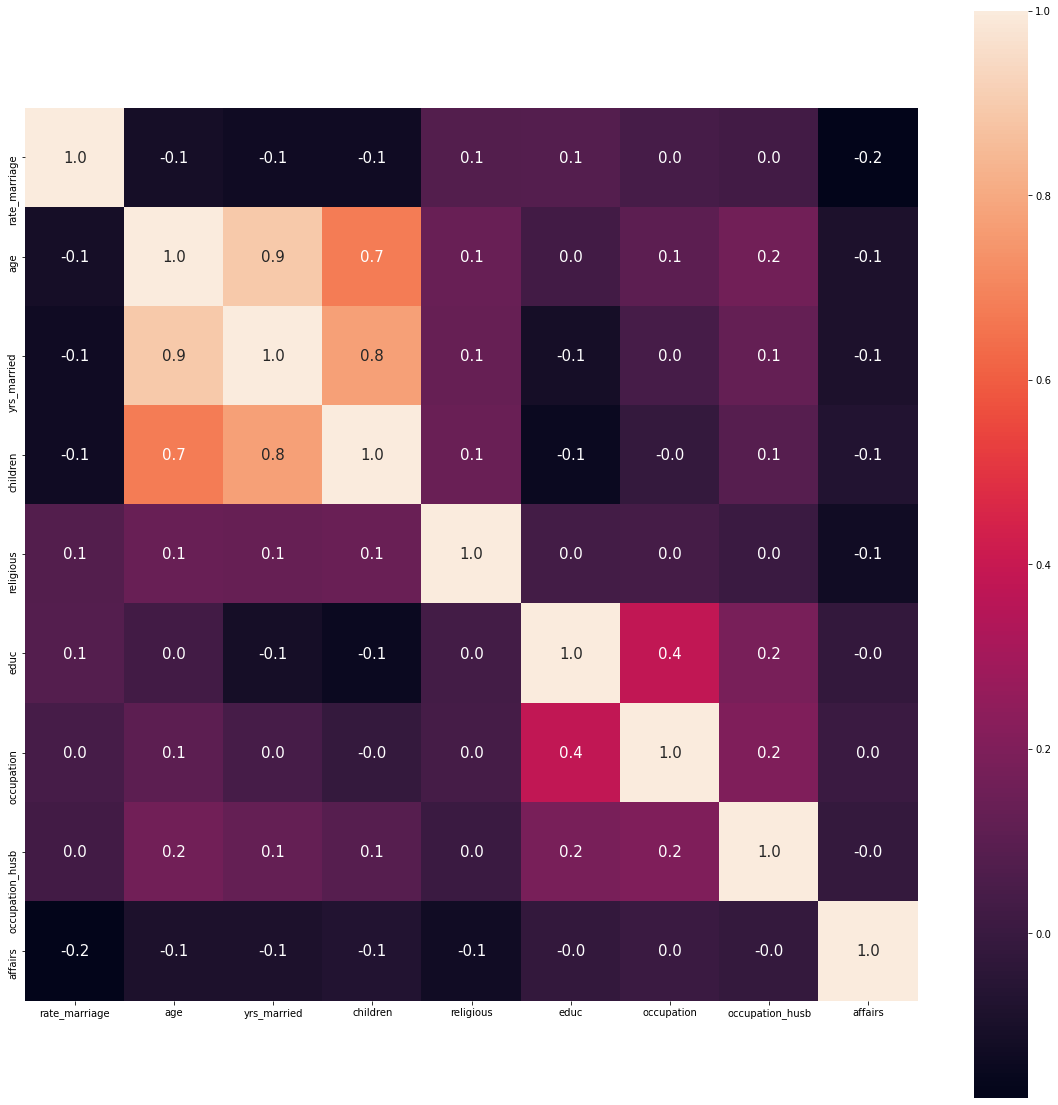

In [18]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})

plt.savefig('correlation Heatmap plot.png')

**Observation**


*   There are **high positive correlation** in below pairs of features
*   **age** and **yrs_married**
*   **yrs_married** and **children**

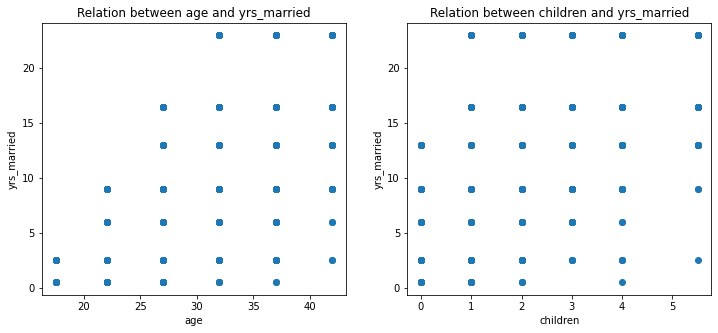

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(12,5))
features = [['age','yrs_married'],['children','yrs_married']]
for i, col in enumerate(features):
    plt.subplot(1, len(features),i+1)
    x = dataset[col[0]]
    y = dataset[col[1]]
    plt.scatter(x=x, y=y, marker='o')
    plt.title('Relation between {} and {}'.format(col[0],col[1]))
    plt.xlabel(col[0])
    plt.ylabel(col[1])
plt.show()

plt.savefig("age,yrs_married-children,yrs_married plot.png")

In [20]:
# drop correlated features
dataset.drop(columns=['age','children'], inplace=True)

# shape of dataframe
dataset.shape

(6366, 7)

In [21]:
dataset.head(5)

,rate_marriage,yrs_married,religious,educ,occupation,occupation_husb,affairs
0,3.0,9.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,13.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,2.5,1.0,16.0,3.0,5.0,1.400000
3,4.0,16.5,3.0,16.0,5.0,5.0,0.727273
4,5.0,9.0,1.0,14.0,3.0,4.0,4.666666


In [23]:
dataset['affair'] = (dataset.affairs >0).astype(int)

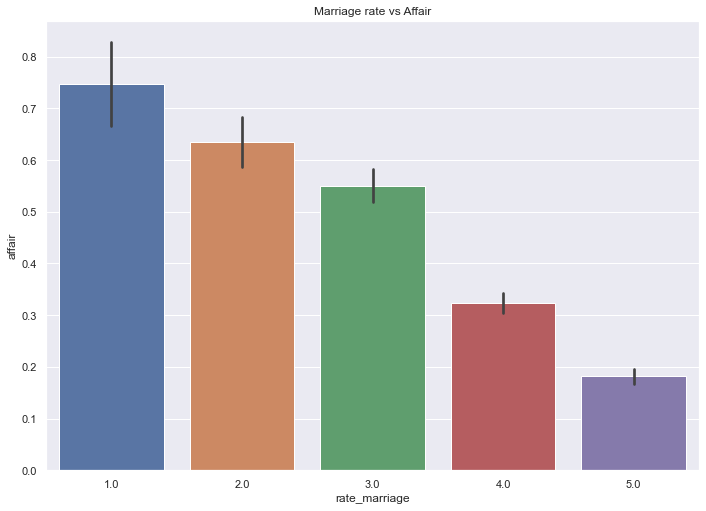

<Figure size 842.4x595.44 with 0 Axes>

In [25]:
# Density plot of price

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x= dataset['rate_marriage'],  y=dataset['affair'])
plt.title('Marriage rate vs Affair')
plt.show()

plt.savefig("Marriage rate vs Affair plot.png")


# MODEL Evaluation

In [28]:
y, X = dmatrices('affair ~ rate_marriage + yrs_married  + \
religious + educ + C(occupation) + C(occupation_husb)',
dataset, return_type="dataframe")
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)


In [29]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,yrs_married,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,9.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,13.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.5,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,16.5,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,9.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,13.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,13.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.5,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,6.0,3.0,14.0


In [31]:
#-------------------------loops for known which variable under categorical columns


category_features = []
threshold = 10
for each in X.columns:
    if X[each].nunique() < threshold:
        category_features.append(each)

for each in category_features:
    X[each] = X[each].astype('category')
    

category_features

['Intercept',
 'occ_2',
 'occ_3',
 'occ_4',
 'occ_5',
 'occ_6',
 'occ_husb_2',
 'occ_husb_3',
 'occ_husb_4',
 'occ_husb_5',
 'occ_husb_6',
 'rate_marriage',
 'yrs_married',
 'religious',
 'educ']

In [33]:
y # target column (Binary Type)

array([1., 1., 1., ..., 0., 0., 0.])

In [34]:
# drop unused column
X = X.drop(columns=['Intercept'])

In [35]:
X

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,yrs_married,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,9.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,13.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.5,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,16.5,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,9.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,13.0,3.0,17.0
6362,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,13.0,1.0,16.0
6363,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.5,2.0,14.0
6364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,6.0,3.0,14.0


In [40]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [41]:
print("Split the data into training and test set")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=355)


Split the data into training and test set


In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4774, 14)
(4774,)
(1592, 14)
(1592,)


In [43]:
print('-'*30,' Shape of train and test dataset ','-'*30)
print('X train : {}, y train: {}'.format(X_train.shape, y_train.shape))
print('X test : {}, y test: {}'.format(X_test.shape, y_test.shape))
print('-'*100)

------------------------------  Shape of train and test dataset  ------------------------------
X train : (4774, 14), y train: (4774,)
X test : (1592, 14), y test: (1592,)
----------------------------------------------------------------------------------------------------


In [49]:
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

C:\Users\sony\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
result=log_reg.fit(X_train,y_train)

C:\Users\sony\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
y_pred = log_reg.predict(X_test)

In [52]:
y_pred

array([1., 0., 0., ..., 1., 1., 0.])

In [53]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7154522613065326

# Confusion Matrix

In [74]:
cf_matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
cf_matrix

array([[971, 113],
       [340, 168]], dtype=int64)

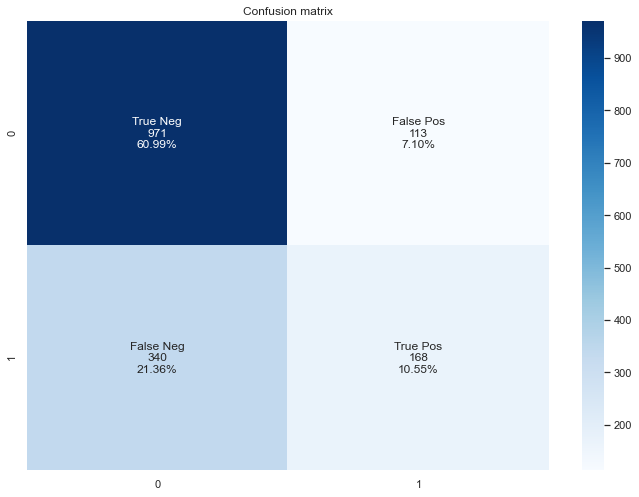

In [75]:
# plot confusion matrix

# labels
group_names = ['True Neg','False Pos','False Neg','True Pos']
# counts
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
# percentages
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.title('Confusion matrix')

plt.savefig("Confusion matrix plot.png")


In [76]:
#Calculation of Precision Recall and F1 score
TN = cf_matrix[0,0] #True Negative
FP = cf_matrix[0,1] #False Positive
FN = cf_matrix[1,0] #False Negative
TP = cf_matrix[1,1] #True Positive
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
F1 = (2 *(Precision * Recall)) / (Precision + Recall)
print("Precision : {} , Recall : {}, F1 : {}".format(Precision,Recall,F1))

Precision : 0.597864768683274 , Recall : 0.33070866141732286, F1 : 0.4258555133079848


In [77]:
TN = cf_matrix[0][0]
FP = cf_matrix[0][1]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]

In [78]:
TN,FP,FN,TP

(971, 113, 340, 168)

In [79]:
# accuracy
accuracy = (TP + TN) / (TN+FP+FN+TP)
accuracy

0.7154522613065326

In [80]:
# precision
precision = TP / (TP+FP)
precision

0.597864768683274

In [81]:
# recall
recall = TP /(TP + FN)
recall

0.33070866141732286

In [82]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.6132325594909493

In [83]:
#Calculation of True Positive Rate and False Positive Rate
TPR = (TP) / (TP + FN ) #equal to Recall
FPR = FP / (FP + TN )
print("True Positive Rate : {}, False Positive Rate : {}".format(TPR,FPR))

True Positive Rate : 0.33070866141732286, False Positive Rate : 0.10424354243542436


In [84]:
TPR,FPR, thresholds = roc_curve(y_test, y_pred)

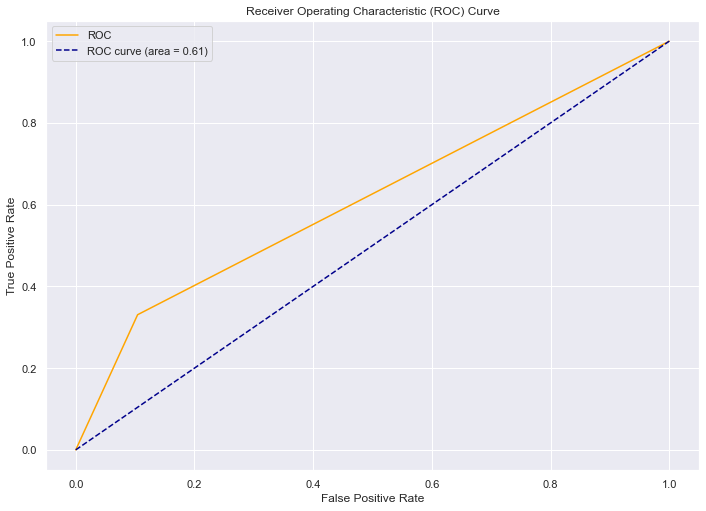

<Figure size 842.4x595.44 with 0 Axes>

In [87]:
plt.plot(TPR,FPR, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

plt.savefig("Receiver Operating Characteristic (ROC) Curve plot.png")

In [89]:
# SAVE MODEL
import pickle

filename = 'woman_affair_model.pickle'
pickle.dump(log_reg, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))